# Solar Readings - Data Visualization

Data taken from home solar panel since it was turned on after installation on 9/1/2015 until current date

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Reading in solar readings csv file

In [2]:
df = pd.read_csv("SolarReadings.2021.11.29.csv")

Checking on data with df.head()

In [3]:
df.head()

,Date,ID,Net Kwh,DailyGenerations
0,9/1/2015,1,12,12
1,9/2/2015,2,24,12
2,9/3/2015,3,35,11
3,9/4/2015,4,46,11
4,9/5/2015,5,58,12


In [4]:
df.tail()

,Date,ID,Net Kwh,DailyGenerations
2277,11/25/2021,2278,19370,7
2278,11/26/2021,2279,19376,6
2279,11/27/2021,2280,19382,6
2280,11/28/2021,2281,19387,5
2281,11/29/2021,2282,19393,6


Getting shape of dataframe

In [5]:
df.shape

(2282, 4)

### Plotting the Average Daily kWh Generation by Month

Data wrangling the date column

In [6]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date['month']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)
df_date.columns.values[0]='year'
df_date.info()
df_date.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    2282 non-null   object
 1   month   2282 non-null   object
 2   daily   2282 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 53.6+ KB


,year,month,daily
0,2015,09,12
1,2015,09,12
2,2015,09,11
3,2015,09,11
4,2015,09,12


In [7]:
df_january = df_date[df_date['month']=="01"]
df_january.info()
df_january.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 122 to 1979
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    186 non-null    object
 1   month   186 non-null    object
 2   daily   186 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


,year,month,daily
122,2016,01,7
123,2016,01,3
124,2016,01,3
125,2016,01,3
126,2016,01,2


In [8]:
df_january.shape

(186, 3)

(0.0, 40.0)

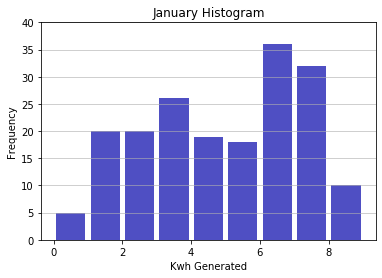

In [9]:
n, bins, patches = plt.hist(x=df_january['daily'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.figure(figsize=(20,10))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Kwh Generated')
plt.ylabel('Frequency')
plt.title('January Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 274 to 2129
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    180 non-null    object
 1   month   180 non-null    object
 2   daily   180 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.6+ KB
(180, 3)


(0.0, 80.0)

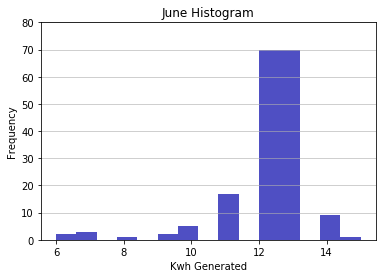

In [10]:
df_june = df_date[df_date['month']=="06"]

df_june.info()
print(df_june.shape)

n, bins, patches = plt.hist(x=df_june['daily'], bins=15, color='#0504aa',
                            alpha=0.7)
#plt.figure(figsize=(20,10))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Kwh Generated')
plt.ylabel('Frequency')
plt.title('June Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [11]:
df_date2 = df_date.copy()
df_date2 = df_date2.astype({'year':int,'month':int,'daily':int})
df_date2.info()

df_warm = df_date2[(df_date2['month'] > 3) & (df_date2['month'] < 10)]
df_cold = df_date2[(df_date2['month'] < 4) | (df_date2['month'] > 9)] #or ((df_date2['month'] > 9) & (df_date2['month'] < 13))]
#df_warm = df_date2[df_date2['monthDay'] == 4]
#df_warm.info()

df_warm.info()
df_cold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    2282 non-null   int32
 1   month   2282 non-null   int32
 2   daily   2282 non-null   int32
dtypes: int32(3)
memory usage: 26.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 2221
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    1128 non-null   int32
 1   month   1128 non-null   int32
 2   daily   1128 non-null   int32
dtypes: int32(3)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 30 to 2281
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    1154 non-null   int32
 1   month   1154 non-null   int32
 2   daily   1154 non-null   int32
dtypes: int32(3)
memory usage: 22.5 KB


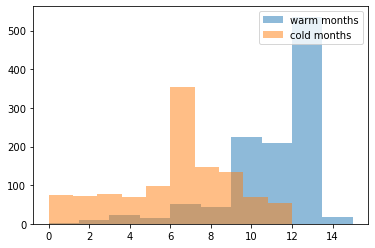

In [12]:
plt.hist(df_warm['daily'], alpha = .5, label = "warm months")
plt.hist(df_cold['daily'], alpha = .5, label = "cold months")
plt.legend(loc="upper right")
plt.show()

In [13]:
from scipy import stats
print(stats.describe(df_warm['daily']))
print(stats.describe(df_cold['daily']))

DescribeResult(nobs=1128, minmax=(0, 15), mean=10.796099290780141, variance=5.182877406281662, skewness=-1.6441132731789798, kurtosis=3.0060821826380337)
DescribeResult(nobs=1154, minmax=(0, 12), mean=6.250433275563259, variance=7.658824616966364, skewness=-0.2693477813365375, kurtosis=-0.5951782332718909)


In [14]:
stats.ttest_ind(df_warm['daily'], df_cold['daily'])

Ttest_indResult(statistic=42.798047199109206, pvalue=2.9030233768478815e-294)

Grouping by month for average daily Kwh

In [15]:
df_daily_average = df_date.groupby(['month'], as_index=False).mean()
df_daily_average.head(12)

,month,daily
0,01,4.435484
1,02,6.970588
2,03,8.037634
3,04,10.077778
4,05,11.032258
5,06,12.150000
6,07,11.962366
7,08,10.419355
8,09,9.342857
9,10,7.820276


Getting shape of new dataframe

In [16]:
df_daily_average.shape

(12, 2)

Plotting Line Graph

Text(0, 0.5, 'Daily kWh')

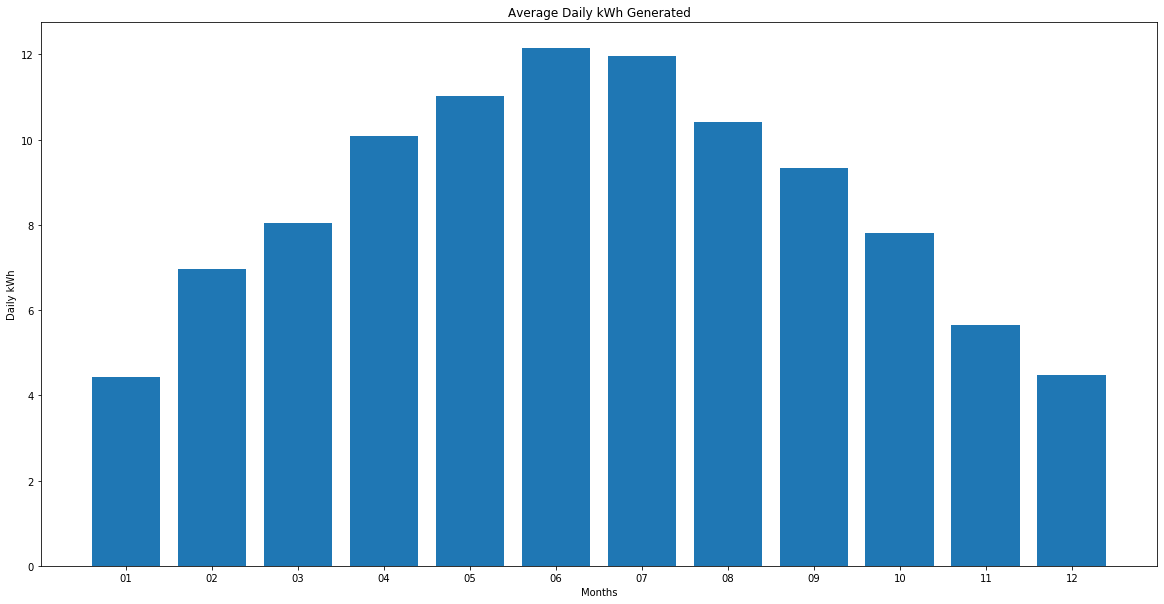

In [17]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.bar(df_daily_average['month'],df_daily_average['daily'])
plt.title("Average Daily kWh Generated")
plt.xlabel("Months")
plt.ylabel("Daily kWh")

### Plotting the Total Generation per Year

Data wrangling

In [18]:
df['Year'] = df['Date'].str[-4:]
df_year_daily = df.groupby(['Year'], as_index=False).sum()
df_year_daily.head(7)

,Year,ID,Net Kwh,DailyGenerations
0,2015,7503,64043,892
1,2016,111813,919165,3173
2,2017,244915,2049880,3065
3,2018,378140,3176235,3071
4,2019,511365,4282289,3044
5,2020,646539,5420561,3052
6,2021,704628,5939175,3094


Plotting bar chart

Text(0.5, 0, 'Years')

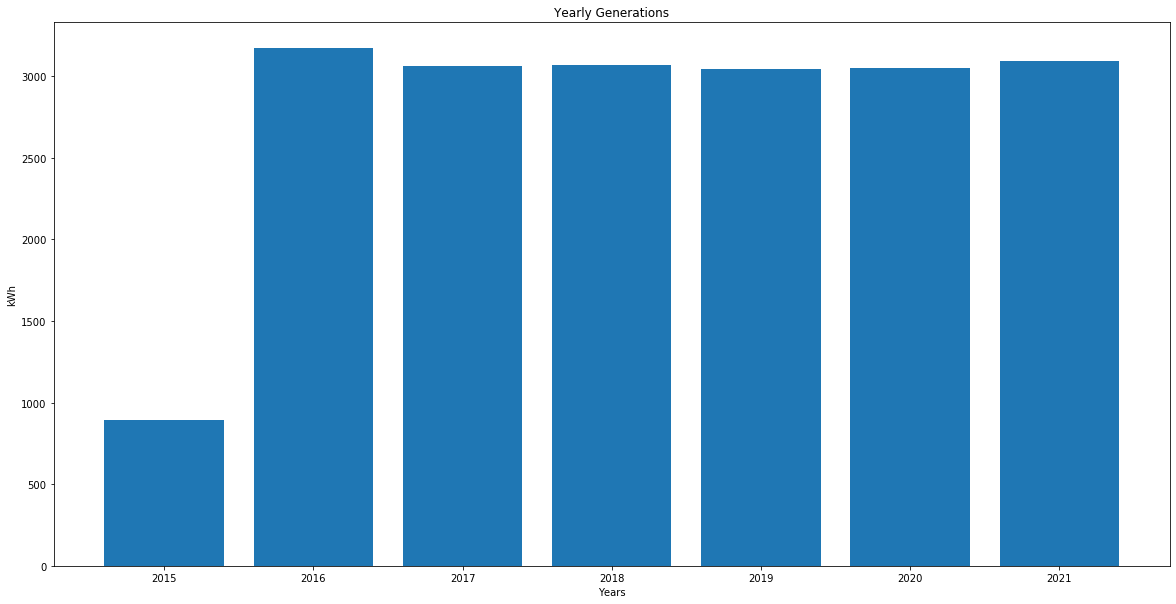

In [19]:
plt.figure(figsize=(20,10))
plt.bar(df_year_daily['Year'],df_year_daily['DailyGenerations'])
plt.title('Yearly Generations')
plt.ylabel("kWh")
plt.xlabel("Years")

### Total Monthly Generation By Year

Data wrangling

In [20]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date.head()


df_date['monthDay']=df_date[0]
df_date['dailykWh'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)

df_date.columns.values[0]='year'
df_year_2015 = df_date[df_date['year']=="2015"]
df_year_2016 = df_date[df_date['year']=="2016"]
df_year_2017 = df_date[df_date['year']=="2017"]
df_year_2018 = df_date[df_date['year']=="2018"]
df_year_2019 = df_date[df_date['year']=="2019"]
df_year_2020 = df_date[df_date['year']=="2020"]
df_year_2021 = df_date[df_date['year']=="2021"]

df_daily_average1 = df_year_2015.groupby(['monthDay'], as_index=False).sum()
df_daily_average2 = df_year_2016.groupby(['monthDay'], as_index=False).sum()
df_daily_average3 = df_year_2017.groupby(['monthDay'], as_index=False).sum()
df_daily_average4 = df_year_2018.groupby(['monthDay'], as_index=False).sum()
df_daily_average5 = df_year_2019.groupby(['monthDay'], as_index=False).sum()
df_daily_average6 = df_year_2020.groupby(['monthDay'], as_index=False).sum()
df_daily_average7 = df_year_2021.groupby(['monthDay'], as_index=False).sum()

Plotting line graph

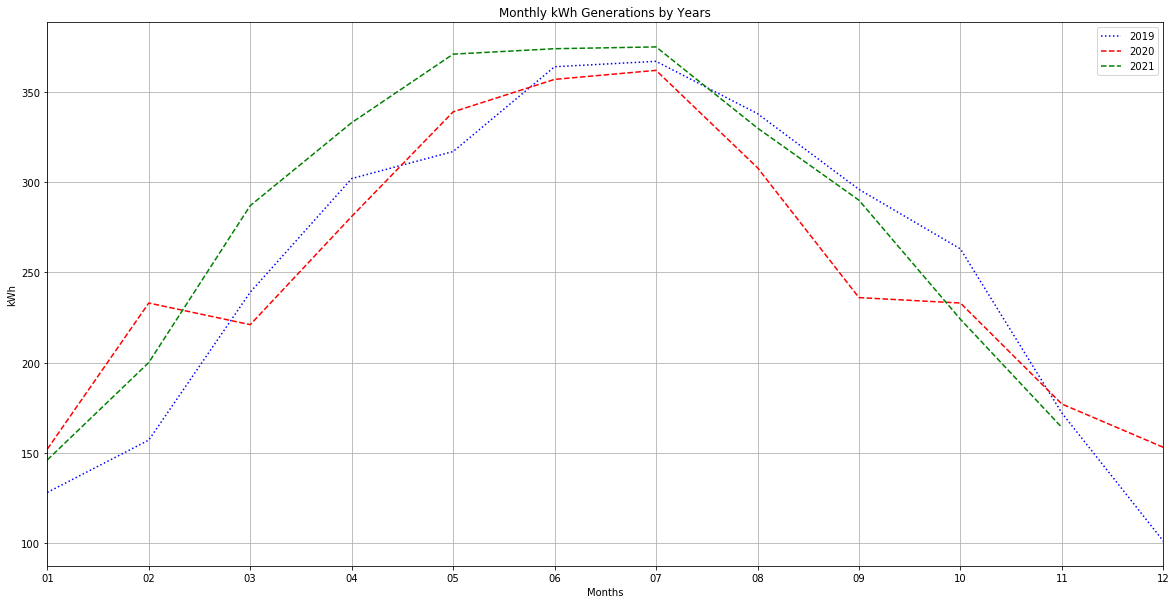

In [38]:
plt.figure(figsize=(20,10))

#plt.plot(df_daily_average1['monthDay'],df_daily_average1['dailykWh'],'-.c',label='2015')
#plt.plot(df_daily_average2['monthDay'],df_daily_average2['dailykWh'],'--m',label='2016')
#plt.plot(df_daily_average3['monthDay'],df_daily_average3['dailykWh'],'-.r',label='2017')
#plt.plot(df_daily_average4['monthDay'],df_daily_average4['dailykWh'],'-.g',label='2018')
plt.plot(df_daily_average5['monthDay'],df_daily_average5['dailykWh'],':b',label='2019')
plt.plot(df_daily_average6['monthDay'],df_daily_average6['dailykWh'],'--r',label='2020')
plt.plot(df_daily_average7['monthDay'],df_daily_average7['dailykWh'],'--g',label='2021')

plt.title('Monthly kWh Generations by Years')
plt.xlabel("Months")
plt.ylabel("kWh")

plt.xlim(0,11)
plt.grid()
plt.legend()

## Scattered Plot

In [39]:
df_days = df['Date'].str.split("/", n=2, expand=True)
df_days[1] = df_days[1].apply('{:0>2}'.format)
df_days[0] = df_days[0].astype(float)
df_days[1] = df_days[1].astype(float)
df_days[1] = df_days[1]/31 #days divided by 31 as the max days in a month
df_days['monthday'] = df_days[0]+(df_days[1])
df_days['dailyKwh'] = df['DailyGenerations']
df_days=df_days.drop([0,1,2], axis=1)

df_days.sort_values(by=['monthday'],inplace=True)
df_days.info()
#df_days.head(30)
#df_days.tail()

df_days_ave = df_days.groupby(['monthday'], as_index=False).mean()

df_days.head(35)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 1583 to 1948
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   monthday  2282 non-null   float64
 1   dailyKwh  2282 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 53.5 KB


,monthday,dailyKwh
1583,1.032258,3
853,1.032258,5
1949,1.032258,4
1218,1.032258,6
122,1.032258,7
488,1.032258,6
854,1.064516,1
123,1.064516,3
1219,1.064516,7
489,1.064516,4


Text(0, 0.5, 'kWh')

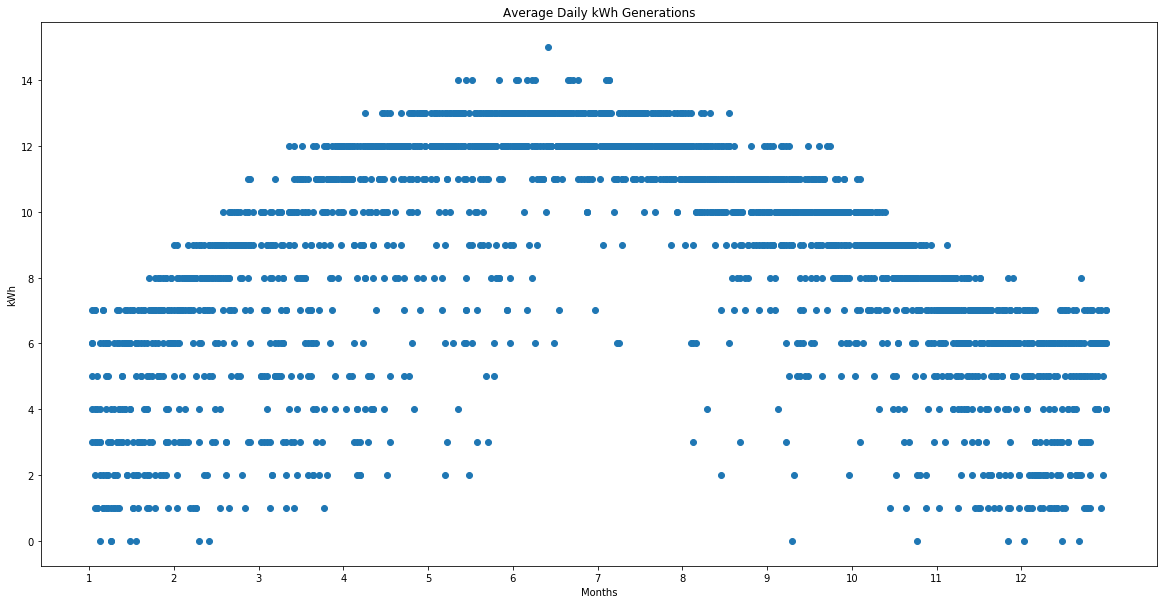

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(df_days['monthday'],df_days['dailyKwh'])
plt.xticks(np.arange(1, 13, step=1))
plt.title('Average Daily kWh Generations')
plt.xlabel("Months")
plt.ylabel("kWh")

## Scattered Plot with Linear Regression

Coefficent: [[-0.07444268]]
Intercept: [9.0308163]
Root Mean Square Erro: 3.3952762730572372
R-Squared: 0.00573782718078808


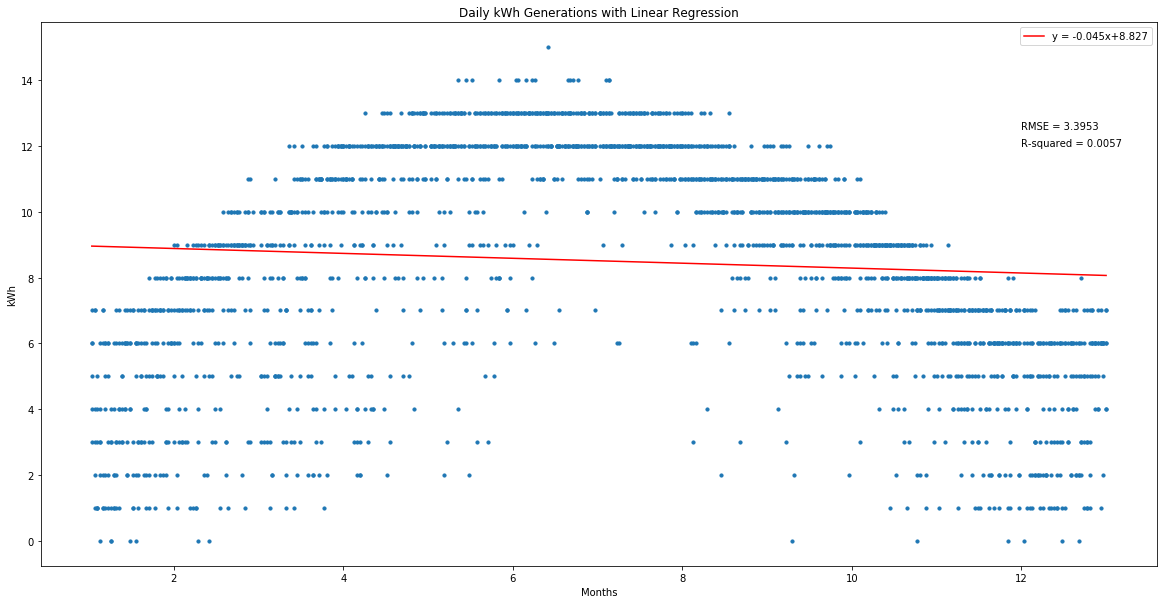

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# transforming the data to include another axis
x = df_days[['monthday']]
y = df_days[['dailyKwh']]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print("Coefficent:",model.coef_)
print("Intercept:",model.intercept_)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("Root Mean Square Erro:",rmse)
print("R-Squared:",r2)

plt.figure(figsize=(20,10))
plt.scatter(df_days['monthday'], df_days['dailyKwh'], s=10)
plt.plot(df_days['monthday'], y_pred, color='r',label="y = -0.045x+8.827")
plt.title('Daily kWh Generations with Linear Regression')

plt.text(12, 12.5, 'RMSE = %0.4f' % rmse)
plt.text(12, 12, 'R-squared = %0.4f' % r2)

plt.legend()
plt.xlabel("Months")
plt.ylabel("kWh")
plt.show()

## Scattered Plot with 2nd Degree Polynomial Regression

Root Mean Square Error: 2.2130362211633625
R-Square: 0.57759628991772
Coefficients: [[ 0.          3.330295   -0.24229356]]
Intercept: [-0.01672149]


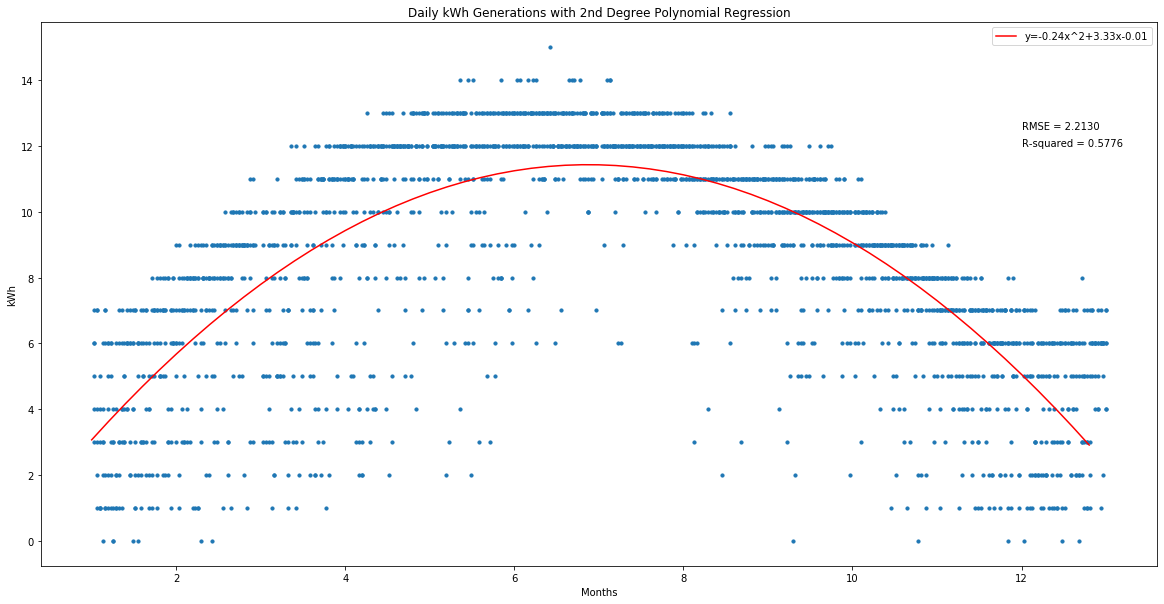

In [49]:
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# transforming the data to include another axis
x = df_days[['monthday']]
x1 = df_days['monthday']
y = df_days[['dailyKwh']]
y1 = df_days['dailyKwh']

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:",rmse)
print("R-Square:",r2)

print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

plt.figure(figsize=(20,10))
plt.scatter(x1, y1, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

XX = np.arange(1.0, 13.0, 0.2)
poly_func = model.intercept_ + model.coef_[0][1]*XX + model.coef_[0][2]*np.power(XX,2)
plt.plot(XX, poly_func, color='r',label="y=-0.24x^2+3.33x-0.01")

plt.text(12, 12.5, 'RMSE = %0.4f' % rmse)
plt.text(12, 12, 'R-squared = %0.4f' % r2)

plt.title('Daily kWh Generations with 2nd Degree Polynomial Regression')
plt.xlabel("Months")
plt.ylabel("kWh")

plt.legend()
plt.show()

Root Mean Square Error: 1.0420867378874337
R-Square: 0.8628699413997598
Coefficients: [[ 0.          3.3291543  -0.24190923]]
Intercept: [-0.01087695]


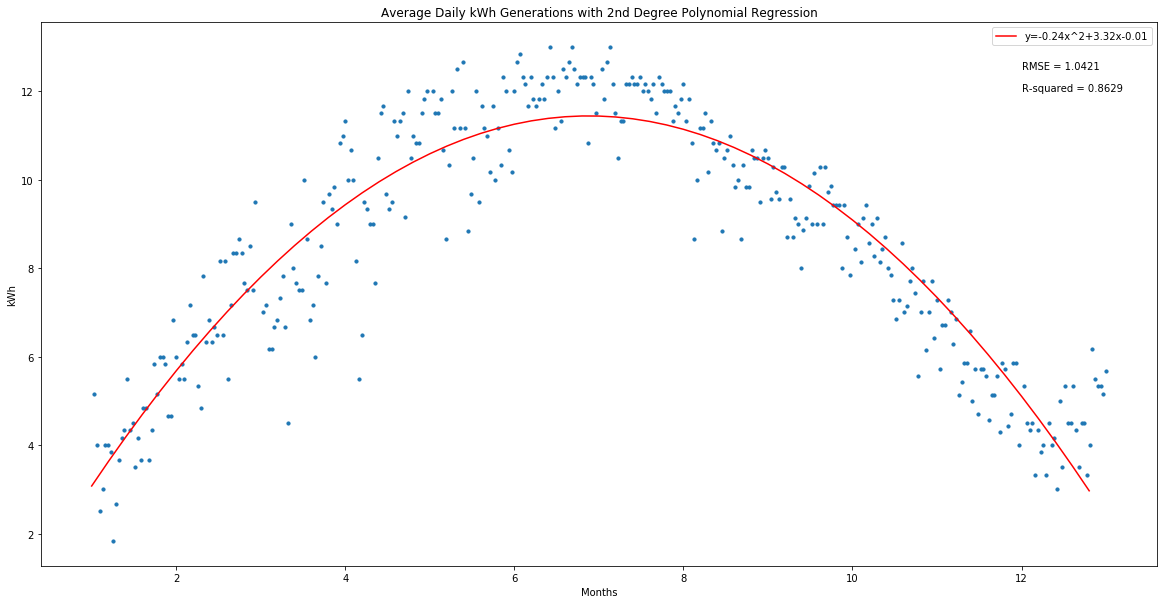

In [50]:
# transforming the data to include another axis
x = df_days_ave[['monthday']]
x1 = df_days_ave['monthday']
y = df_days_ave[['dailyKwh']]
y1 = df_days_ave['dailyKwh']

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:",rmse)
print("R-Square:",r2)

print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

plt.figure(figsize=(20,10))
plt.scatter(x1, y1, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

XX = np.arange(1.0, 13.0, 0.2)
poly_func = model.intercept_ + model.coef_[0][1]*XX + model.coef_[0][2]*np.power(XX,2)
plt.plot(XX, poly_func, color='r',label="y=-0.24x^2+3.32x-0.01")

plt.text(12, 12.5, 'RMSE = %0.4f' % rmse)
plt.text(12, 12, 'R-squared = %0.4f' % r2)

plt.title('Average Daily kWh Generations with 2nd Degree Polynomial Regression')
plt.xlabel("Months")
plt.ylabel("kWh")

plt.legend()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2282 non-null   object
 1   ID                2282 non-null   int64 
 2   Net Kwh           2282 non-null   int64 
 3   DailyGenerations  2282 non-null   int64 
 4   Year              2282 non-null   object
dtypes: int64(3), object(2)
memory usage: 89.3+ KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2282 entries, 2015-09-01 to 2021-11-29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2282 non-null   object 
 1   DailyGenerations  2282 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.5+ KB


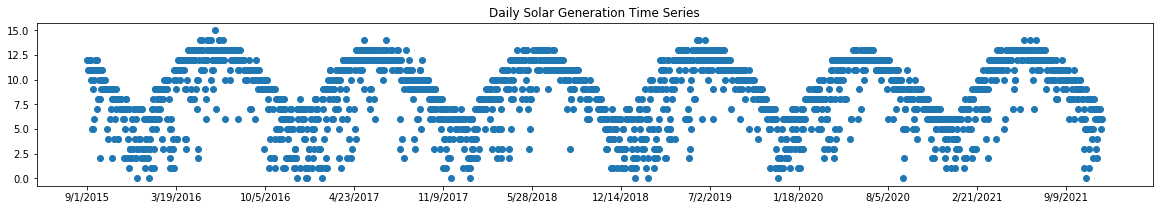

In [27]:
df_ts = df.copy()
df_ts.index = pd.to_datetime(df_ts.Date)
df_ts = df_ts.drop(columns=['ID','Net Kwh','Year'])
df_ts['DailyGenerations'] = df_ts['DailyGenerations'].astype(float)
#df_ts = df_ts.astype({"DailyGeneration": float})
df_ts.info()
#df_ts.head()
plt.figure(figsize=(20,3))
plt.scatter(df_ts.Date, df_ts.DailyGenerations)
plt.xticks(np.arange(0, len(df_ts), step=200))  # Set label locations.
plt.title('Daily Solar Generation Time Series')
plt.show()

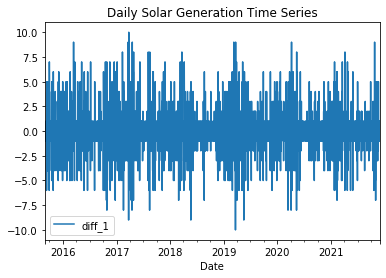

In [28]:
df_ts['diff_1'] = df_ts.DailyGenerations - df_ts.DailyGenerations.shift()
df_ts.plot(y='diff_1')
plt.title('Daily Solar Generation Time Series')
plt.show()

Text(0.5, 1.0, 'Solar Generation PACF')

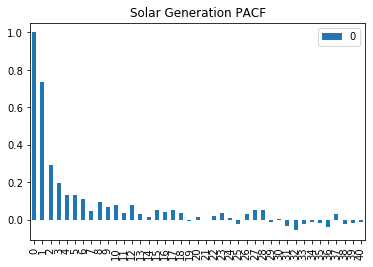

In [29]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df_ts.DailyGenerations))
x_acf.plot(kind='bar')
plt.title("Solar Generation PACF")

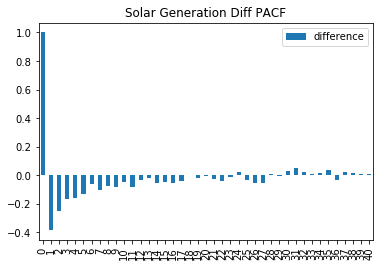

In [30]:
x_acf = pd.DataFrame(pacf(df_ts.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Solar Generation Diff PACF")
plt.legend(['difference'])

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_ts.DailyGenerations, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:     D.DailyGenerations   No. Observations:                 2281
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5297.959
Method:                           css   S.D. of innovations              2.469
Date:                Mon, 29 Nov 2021   AIC                          10599.917
Time:                        22:22:08   BIC                          10611.382
Sample:                    09-02-2015   HQIC                         10604.099
                         - 11-29-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.052     -0.051      0.959      -0.104       0.099
Residuals Description
count    2.281000e+03
mean     1.772248e-08
std      2.469284e+00
min     -9.997370e+00
25%     -9.973696e-01

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_ts.DailyGenerations, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       DailyGenerations   No. Observations:                 2282
Model:                     ARMA(1, 0)   Log Likelihood               -5139.834
Method:                       css-mle   S.D. of innovations              2.301
Date:                Mon, 29 Nov 2021   AIC                          10285.669
Time:                        22:22:09   BIC                          10302.867
Sample:                    09-01-2015   HQIC                         10291.942
                         - 11-29-2021                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8.4986      0.183     46.442      0.000       8.140       8.857
ar.L1.DailyGenerations     0.7371      0.014     52.135      0.000       0.709       0.765
    

In [33]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_ts.DailyGenerations, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       DailyGenerations   No. Observations:                 2282
Model:                     ARMA(1, 1)   Log Likelihood               -4941.392
Method:                       css-mle   S.D. of innovations              2.109
Date:                Mon, 29 Nov 2021   AIC                           9890.783
Time:                        22:22:10   BIC                           9913.715
Sample:                    09-01-2015   HQIC                          9899.147
                         - 11-29-2021                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8.5048      0.536     15.855      0.000       7.453       9.556
ar.L1.DailyGenerations     0.9754      0.006    161.425      0.000       0.964       0.987
ma.L

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(df_ts.DailyGenerations, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:     D.DailyGenerations   No. Observations:                 2281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4907.061
Method:                       css-mle   S.D. of innovations              2.079
Date:                Mon, 29 Nov 2021   AIC                           9822.121
Time:                        22:22:10   BIC                           9845.051
Sample:                    09-02-2015   HQIC                          9830.485
                         - 11-29-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0022      0.007     -0.310      0.757      -0.016       0.012
ar.L1.D.DailyGenerations     0.2604      0.025     10.271      0.000       0.211       0.

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model_414 = ARIMA(df_ts.DailyGenerations, order=(4,1,4))
model_414_fit = model_414.fit()
print(model_414_fit.summary())
print('Residuals Description')
print(model_414_fit.resid.describe())

C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Low\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:     D.DailyGenerations   No. Observations:                 2281
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4901.681
Method:                       css-mle   S.D. of innovations              2.075
Date:                Mon, 29 Nov 2021   AIC                           9823.363
Time:                        22:22:14   BIC                           9880.687
Sample:                    09-02-2015   HQIC                          9844.271
                         - 11-29-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0022      0.007     -0.315      0.753      -0.016       0.012
ar.L1.D.DailyGenerations    -1.4068      0.202     -6.954      0.000      -1.803      -1.

Text(0.5, 1.0, 'Histogram of Residuals')

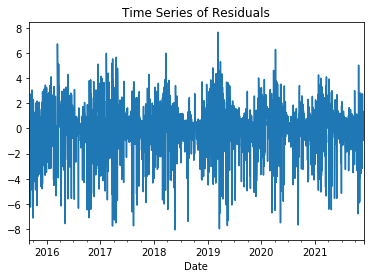

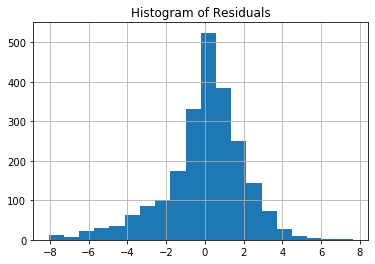

In [36]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')